# 데이터셋 다운로드

타이타닉 데이터셋: https://www.kaggle.com/heptapod/titanic

In [ ]:
!kaggle datasets download -d heptapod/titanic

Dataset URL: https://www.kaggle.com/datasets/heptapod/titanic
License(s): DbCL-1.0
  0% 0.00/10.8k [00:00<?, ?B/s]
100% 10.8k/10.8k [00:00<00:00, 11.6MB/s]


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: train_and_test2.csv     


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터셋 로드

In [ ]:
df = pd.read_csv('train_and_test2.csv')

df.head(5)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [ ]:
df.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [ ]:
df.tail(10)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
1299,1300,28.0,7.7208,1,0,0,0,0,0,0,...,0,0,0,3,0,0,1.0,0,0,0
1300,1301,3.0,13.7750,1,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1301,1302,28.0,7.7500,1,0,0,0,0,0,0,...,0,0,0,3,0,0,1.0,0,0,0
1302,1303,37.0,90.0000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,1.0,0,0,0
1303,1304,28.0,7.7750,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1308,1309,28.0,22.3583,0,1,0,0,0,0,0,...,0,0,0,3,0,0,0.0,0,0,0


# 사용하는 칼럼만 추출

In [ ]:
df = pd.read_csv('train_and_test2.csv', usecols=[
  'Age', # 나이
  'Fare', # 승차 요금
  'Sex', # 성별
  'sibsp', # 타이타닉에 탑승한 형제자매, 배우자의 수
  'Parch', # 타이타니게 탑승한 부모, 자식의 수
  'Pclass', # 티켓 등급 (1, 2, 3등석)
  'Embarked', # 탑승국
  '2urvived' # 생존 여부 (0: 사망, 1: 생존)
])

df.head(5)

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


# 간단하게 데이터셋 미리보기

성별에 따른 생존자 수

<Axes: xlabel='Sex', ylabel='count'>

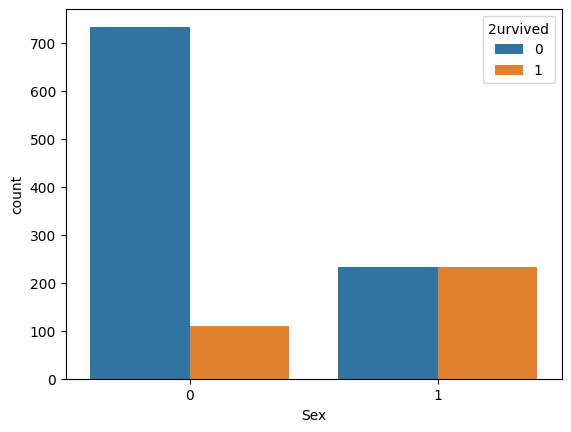

In [ ]:
sns.countplot(x='Sex', hue='2urvived', data=df)

# 생존여부 클래스의 개수 확인

<Axes: xlabel='2urvived', ylabel='count'>

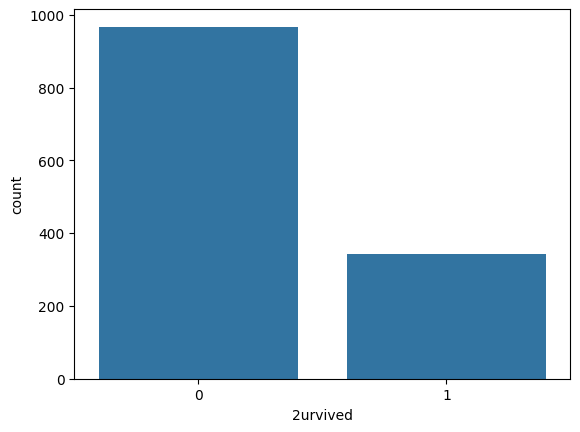

In [ ]:
sns.countplot(x=df['2urvived'])

# 전처리 (Preprocessing)

## 비어있는 행 확인

1. 비어있는 값(null 또는 na)이 있는지 확인하고,
2. 비어있는 값을 포함한 행을 제거한다

In [ ]:
print(df.isnull().sum())

Age         0
Fare        0
Sex         0
sibsp       0
Parch       0
Pclass      0
Embarked    2
2urvived    0
dtype: int64


In [ ]:
print(len(df))

df = df.dropna()

print(len(df))

1309
1307


## X, y 데이터 분할

In [ ]:
x_data = df.drop(columns=['2urvived'], axis=1)
x_data = x_data.astype(np.float32)

x_data.head(5)

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked
0,22.0,7.250000,0.0,1.0,0.0,3.0,2.0
1,38.0,71.283302,1.0,1.0,0.0,1.0,0.0
2,26.0,7.925000,1.0,0.0,0.0,3.0,2.0
3,35.0,53.099998,1.0,1.0,0.0,1.0,2.0
4,35.0,8.050000,0.0,0.0,0.0,3.0,2.0


In [ ]:
y_data = df[['2urvived']]
y_data = y_data.astype(np.float32)

y_data.head(5)

,2urvived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


## 표준화 (Standardization)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

z = (x - u) / s

z = (x - 평균) / 표준편차

In [ ]:
## sklearn 모듈에 StandardScaler() 라는 함수를 활용하여 표준화를 진행
scaler = StandardScaler()  ### normalization을 활용할 때는 MinMaxScaler()를 이용
x_data_scaled = scaler.fit_transform(x_data)

print(x_data.values[0])
print(x_data_scaled[0])

[22.    7.25  0.    1.    0.    3.    2.  ]
[-0.58026063 -0.5018386  -0.74189967  0.48027176 -0.44540733  0.8404475
  0.6229398 ]


# 학습/검증 데이터 분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(1045, 7) (262, 7)
(1045, 1) (262, 1)


# 모델 학습

In [ ]:
model = Sequential([
  Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['acc'])  ## 손실함수는 'binary_crossentropy', 분류문제에 있어서는 metrics 은  'acc'를 자주 사용(0~1 값을 가짐)

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=20 # epochs 복수형으로 쓰기!
)

Epoch 1/20
33/33 [==============================] - 1s 13ms/step - loss: 7.0300 - acc: 0.3330 - val_loss: 0.9790 - val_acc: 0.7290
Epoch 2/20
33/33 [==============================] - 0s 4ms/step - loss: 0.8928 - acc: 0.7234 - val_loss: 0.5683 - val_acc: 0.7634
Epoch 3/20
33/33 [==============================] - 0s 4ms/step - loss: 0.5984 - acc: 0.7282 - val_loss: 0.4990 - val_acc: 0.7519
Epoch 4/20
33/33 [==============================] - 0s 4ms/step - loss: 0.5517 - acc: 0.7273 - val_loss: 0.4687 - val_acc: 0.7672
Epoch 5/20
33/33 [==============================] - 0s 4ms/step - loss: 0.5279 - acc: 0.7598 - val_loss: 0.4598 - val_acc: 0.7977
Epoch 6/20
33/33 [==============================] - 0s 4ms/step - loss: 0.5175 - acc: 0.7589 - val_loss: 0.4500 - val_acc: 0.7939
Epoch 7/20
33/33 [==============================] - 0s 4ms/step - loss: 0.5103 - acc: 0.7550 - val_loss: 0.4847 - val_acc: 0.7824
Epoch 8/20
33/33 [==============================] - 0s 4ms/step - loss: 0.5029 - acc: 0.7